# IMDB Dataset

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp

tfk = tf.keras
tfkl = tfk.layers 
tfd = tfp.distributions
tfpl = tfp.layers

print("Tensorflow Version: %s" % tf.__version__)
print("Tensorflow Probability Version: %s" % tfp.__version__)

if tf.test.gpu_device_name() != '/device:GPU:0':
    print('GPU device not found. Using CPU')
else:
    print('Found GPU: {}'.format(tf.test.gpu_device_name()))

Tensorflow Version: 2.0.0-beta1
Tensorflow Probability Version: 0.8.0-dev20190619
Found GPU: /device:GPU:0


In [2]:
# load commons and models module
import os
import sys
import importlib

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import commons as cm
importlib.reload(cm)

Tensorflow Version: 2.0.0-beta1
Tensorflow Probability Version: 0.8.0-dev20190619
Found GPU: /device:GPU:0
Tensorflow Version: 2.0.0-beta1
Tensorflow Probability Version: 0.8.0-dev20190619
Found GPU: /device:GPU:0


<module 'models' from 'D:\\Tom\\Documents\\gitworkspace\\master\\ml-probability\\tfp_word_embeddings\\models.py'>

In [99]:
(x_train, y_train), (x_test, y_test) = cm.load_imdb(1.0)
word_index = cm.WordIndex(embedding_dim=50)
print(x_train[0], y_train[0])

[1, 132, 8, 132, 497, 254, 8, 30, 6, 52, 20, 12, 47, 94, 483, 33, 4, 208, 273, 12, 16914, 8, 30, 1711, 5, 12, 47, 6, 749, 15, 57, 824, 1462, 80, 1144, 21, 50, 1838, 82, 49, 7, 4, 712, 7, 14, 431, 12, 12030, 38, 254, 8, 30, 52, 5, 8, 79, 94, 749, 638, 15, 518, 4, 529, 215, 235, 23564, 38, 12, 9, 64, 3927, 15, 4, 1218, 63, 26, 343, 34, 14, 431, 26, 4274, 132, 8, 132, 152, 387, 4, 529, 1197, 51, 29, 1291, 9, 208, 21, 9, 21398, 94, 749, 11, 27, 419, 2315, 10742, 14658, 14, 11, 27, 217, 29, 127, 27, 118, 8, 168, 1947, 2070, 1681, 5, 32, 4, 85, 1438, 25, 70, 2623, 19, 4, 686, 31, 2752, 2827, 27, 10395, 47, 8, 1464, 763, 15, 4, 20, 9, 5585, 5, 1978, 94, 2125, 949, 4, 130, 25, 62, 30, 714, 1638, 8, 4, 1174, 15, 132, 8, 132, 9, 24, 290, 149, 21, 50, 26, 195, 757, 8, 4478, 12, 12, 9, 441, 47, 49, 1984, 139, 5, 4, 123, 3247, 13365, 1091, 2102, 7, 265, 25, 144, 24, 1661, 12, 8, 16985, 4890, 40, 4, 4491, 132, 628, 2219, 21, 490, 30, 1200, 4, 1716, 4095, 12, 497, 8, 4003, 129, 483, 60, 48, 129, 1224

Threshold: 950 -> 390/50000 (0.78%) are not under the threshold
mean: 234
0.00 Quantile: 7 
0.25 Quantile: 129 
0.50 Quantile: 176 
0.75 Quantile: 285 
0.95 Quantile: 598 
1.00 Quantile: 2494 


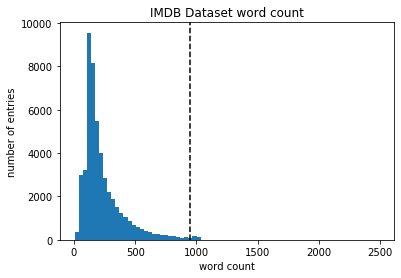

In [95]:
word_counts = [len(n) for n in [*x_train, *x_test]]
threshold = 950
over_threshold_n = np.sum(np.array(word_counts) > threshold)

print("Threshold: %i -> %i/%i (%.2f%%) are not under the threshold" % (threshold, 
                                                                       over_threshold_n, 
                                                                       len([*x_train, *x_test]), 
                                                                       100 * over_threshold_n / len([*x_train, *x_test])))

print("mean: %i" % np.mean(word_counts))
for q in [0, 0.25, 0.5, 0.75, 0.95, 1.0]:
    print("%.2f Quantile: %i " % (q, np.quantile(word_counts, q=q)))

fig, ax = plt.subplots()
plt.hist(word_counts, bins=75)
plt.axvline(x=threshold, color="black", linestyle="--")
plt.xlabel("word count")
plt.ylabel("number of entries")
plt.title("IMDB Dataset word count")
plt.savefig("D:/google drive/haw/master/mastertheisis/hauptprojekt/dataset/imdb_word_count.pdf")
plt.show()

In [100]:
# parsed sentence
print(word_index.vec2sentence(x_train[0]))

<START> man to man tries hard to be a good movie it has its heart at the right place it aspires to be epic and it has a message that no doubt everybody will appreciate but there lies also some of the problems of this picture it strives so hard to be good and to get its message across that sometimes the viewer must feel unchallenged so it is only adequate that the images which are used by this picture are simplistic man to man doesn't let the viewer decide what he thinks is right but is hammering its message in his head joseph fiennes exemplifies this in his role he does his best to look concerned genuinely moved and all the other emotions you can express with the single one facial expression his repertoire has to offer add that the movie is overlong and loses its speed towards the end you would be easily led to the conclusion that man to man is not worth watching but there are enough points to defend it it is entertaining has some humorous scenes and the show stealing kristin scott tho